# Import the necessary libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

from joblib import load

import seaborn as sns

# Import train & test data

In [142]:
# Define the oversampling method (ros, smote, adasyn) method and ratio (50:50, 40:60, 70:30)
# Example: 'smote_30_70' applies SMOTE with a 30:70 direct-to-indirect ratio
rs_type = 'ros_30_70'

# X_train: Feature matrix for training
# y_train: Target labels for training
X_train = pd.read_csv('./Data/Oversampling/X_train_'+ rs_type +'.csv')
y_train = pd.read_csv('./Data/Oversampling/y_train_' + rs_type + ".csv")

# X_test: Feature matrix for testing
# y_test: Target labels for testing
X_test = pd.read_csv('./Data/X_test.csv')
y_test = pd.read_csv('./Data/y_test.csv')

# Drop unecessaries columns
X_test = X_test.drop(columns=['mp_id_bg', 'formula', 'symmetry'])

In [143]:
# Define output filename prefix for saved results
outname = rs_type

# Load trained model

In [144]:
RF = load('./Trained model/RF_'+rs_type+'.joblib') 
XGB = load('./Trained model/XGB_'+rs_type+'.joblib') 

## RF classification report

In [145]:
print('RF')

# Retrieve the best cross-validation F1-score from the trained RF model
f1_scorer = make_scorer(f1_score)
cv_rf = cross_val_score(RF, X_train, y_train.values.ravel(), cv=5, n_jobs=-1, scoring=f1_scorer)

print("Cross Validation Scores:", cv_rf)
print("Mean CV F1:", cv_rf.mean())

# Make predictions on test data
y_pred_rf = RF.predict(X_test)

# Make predictions on test data
print('TEST!')
print(classification_report(y_test, y_pred_rf))

RF
Cross Validation Scores: [0.82011605 0.78225806 0.80916031 0.79166667 0.9527027 ]
Mean CV F1: 0.8311807586775235
TEST!
              precision    recall  f1-score   support

       False       0.91      0.97      0.93       840
        True       0.87      0.69      0.77       274

    accuracy                           0.90      1114
   macro avg       0.89      0.83      0.85      1114
weighted avg       0.90      0.90      0.89      1114



## XGB classification report

In [146]:
print('XGB')

# Retrieve the best cross-validation F1-score from the trained XGB model
f1_scorer = make_scorer(f1_score)
cv_xgb = cross_val_score(XGB, X_train, y_train.values.ravel(), cv=5, n_jobs=-1, scoring=f1_scorer)

print("Cross Validation Scores:", cv_xgb)
print("Mean CV F1:", cv_xgb.mean())

# Make predictions on test data
y_pred_xgb = XGB.predict(X_test)

# Print classification report for XGB
print('TEST!')
print(classification_report(y_test, y_pred_xgb))

XGB
Cross Validation Scores: [0.83969466 0.78823529 0.79924242 0.791587   0.94949495]
Mean CV F1: 0.8336508644863049
TEST!
              precision    recall  f1-score   support

       False       0.91      0.96      0.93       840
        True       0.85      0.71      0.77       274

    accuracy                           0.90      1114
   macro avg       0.88      0.83      0.85      1114
weighted avg       0.89      0.90      0.89      1114



# Evaluation

In [147]:
# Function to evaluate model performance using precision, recall, and F1-score
def eval_score(y_test, y_pred):

    precision_avg = precision_score(y_test, y_pred)
    recall_avg = recall_score(y_test, y_pred)
    f1_avg = f1_score(y_test, y_pred)
    return precision_avg, recall_avg, f1_avg

In [148]:
# Store cross-validation results
df_cv = pd.DataFrame({'Metrics':'CV', 'RF':cv_rf.mean(), 
                      'XGB':cv_xgb.mean()}, index=[0])

# Compute test set evaluation metrics for both models
rf_score = eval_score(y_test, y_pred_rf)
xgb_score = eval_score(y_test, y_pred_xgb)

# Create a DataFrame to store precision, recall, and F1-score for both models
metrics_name = ['Precission', 'Recall', 'F1']
df_score = pd.DataFrame({'Metrics':metrics_name, 'RF':rf_score, 'XGB':xgb_score})

# Combine cross-validation and test evaluation results
df_eval = pd.concat([df_cv,df_score])

df_eval.to_csv('./Result/Eval_'+ rs_type + '.csv', index=False)
df_eval

,Metrics,RF,XGB
0,CV,0.831181,0.833651
0,Precission,0.867580,0.847162
1,Recall,0.693431,0.708029
2,F1,0.770791,0.771372


## Plot confusion matrix

### RF

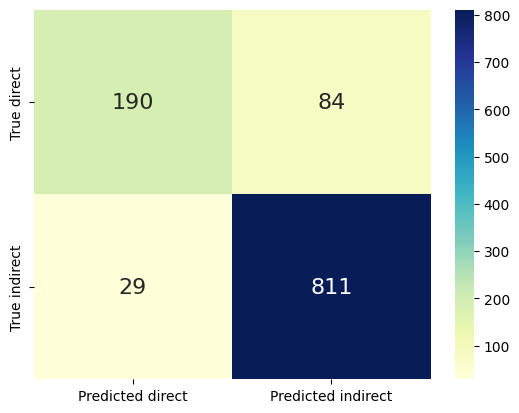

In [149]:
# Plot confusion matrix for RF
cm_rf =sns.heatmap(confusion_matrix(y_test, y_pred_rf, labels=[True,False]),cmap='YlGnBu',
                      fmt = '.0f', 
                      annot=True, annot_kws={"size": 16},
                      xticklabels=['Predicted direct','Predicted indirect'],
                      yticklabels=['True direct','True indirect'])

# Save confusion matrix for RF
plt.savefig('./Result/'+ outname +'_cm_rf.png', dpi=300)
plt.show()

### XGB

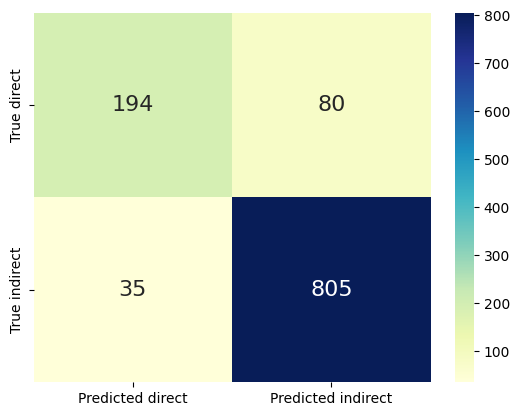

In [150]:
# Plot confusion matrix for XGB
cm_xgb =sns.heatmap(confusion_matrix(y_test, y_pred_xgb, labels=[True,False]),cmap='YlGnBu',
                      fmt = '.0f', 
                      annot=True, annot_kws={"size": 16},
                      xticklabels=['Predicted direct','Predicted indirect'],
                      yticklabels=['True direct','True indirect'])

# Save confusion matrix for XGB
plt.savefig('./Result/'+ outname +'_cm_xgb.png', dpi=300)
plt.show()